# Modelos de Regresion Lineal simulado

$y = a + b*x$
* x: 100 valores distribuidos segun N(1.5, 2.5)
* Ye =  5 + 1.9 * x + e 
* e (error o residuo): esta distribuido segun una N(0,0.8)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Vamos a simular los datos usando random de una distribubion normal para x (el tiempo)
x = 1.5 + 2.5 * np.random.randn(100)

In [5]:
# Vamos a simular los datos usando random de una distribubion normal para res o error (errores tomados en la medicion)
res = 0 + 0.8 * np.random.randn(100)

In [6]:
# y_pred representa los valores esperados en la prediccion
y_pred = 5 +1.9 * x

In [7]:
# Representa el valor de y actualmente con los errores introducidos
y_act = 5 + 1.9 *x + res

$ Distancia = a + Velocidad * Tiempo$ Donde V es la velocidad, en la grafica se conoce como pendiente o variacion. Suponiendo que la velocidad es constante y se introduce un error de medicion.

In [8]:
df = pd.DataFrame({
    'tiempo': x,
    'distancia_pred': y_pred,
    'distancia_real': y_act
})

In [9]:
df.head()

,tiempo,distancia_pred,distancia_real
0,1.170903,7.224715,5.711598
1,0.232948,5.442600,5.364020
2,-2.838272,-0.392717,-0.326662
3,3.142069,10.969932,10.671065
4,-0.238859,4.546168,4.637410


In [10]:
# un tiempo y distancia negativo no viene al caso asi que eliminamos los tiempos negativos
time = df.tiempo > 0.0 

In [11]:
time.head()

0     True
1     True
2    False
3     True
4    False
Name: tiempo, dtype: bool

In [12]:
df = df[time]

In [13]:
df.shape

(68, 3)

In [14]:
x_mean = [np.mean(df.tiempo) for i in range(0, len(df.tiempo))]
df['tiempo_media']= x_mean
x_mean

[2.6920885160529373,
 2.6920885160529373,
 2.6920885160529373,
 2.6920885160529373,
 2.6920885160529373,
 2.6920885160529373,
 2.6920885160529373,
 2.6920885160529373,
 2.6920885160529373,
 2.6920885160529373,
 2.6920885160529373,
 2.6920885160529373,
 2.6920885160529373,
 2.6920885160529373,
 2.6920885160529373,
 2.6920885160529373,
 2.6920885160529373,
 2.6920885160529373,
 2.6920885160529373,
 2.6920885160529373,
 2.6920885160529373,
 2.6920885160529373,
 2.6920885160529373,
 2.6920885160529373,
 2.6920885160529373,
 2.6920885160529373,
 2.6920885160529373,
 2.6920885160529373,
 2.6920885160529373,
 2.6920885160529373,
 2.6920885160529373,
 2.6920885160529373,
 2.6920885160529373,
 2.6920885160529373,
 2.6920885160529373,
 2.6920885160529373,
 2.6920885160529373,
 2.6920885160529373,
 2.6920885160529373,
 2.6920885160529373,
 2.6920885160529373,
 2.6920885160529373,
 2.6920885160529373,
 2.6920885160529373,
 2.6920885160529373,
 2.6920885160529373,
 2.6920885160529373,
 2.6920885160

In [15]:
y_mean = [np.mean(df.distancia_real) for i in range(0, len(df.tiempo))]
df['distancia_media']= y_mean
y_mean

[10.148107748599971,
 10.148107748599971,
 10.148107748599971,
 10.148107748599971,
 10.148107748599971,
 10.148107748599971,
 10.148107748599971,
 10.148107748599971,
 10.148107748599971,
 10.148107748599971,
 10.148107748599971,
 10.148107748599971,
 10.148107748599971,
 10.148107748599971,
 10.148107748599971,
 10.148107748599971,
 10.148107748599971,
 10.148107748599971,
 10.148107748599971,
 10.148107748599971,
 10.148107748599971,
 10.148107748599971,
 10.148107748599971,
 10.148107748599971,
 10.148107748599971,
 10.148107748599971,
 10.148107748599971,
 10.148107748599971,
 10.148107748599971,
 10.148107748599971,
 10.148107748599971,
 10.148107748599971,
 10.148107748599971,
 10.148107748599971,
 10.148107748599971,
 10.148107748599971,
 10.148107748599971,
 10.148107748599971,
 10.148107748599971,
 10.148107748599971,
 10.148107748599971,
 10.148107748599971,
 10.148107748599971,
 10.148107748599971,
 10.148107748599971,
 10.148107748599971,
 10.148107748599971,
 10.148107748

Text(0.5, 0, 'Tiempo')

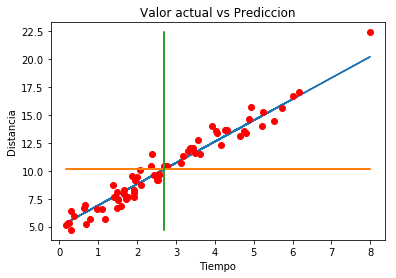

In [16]:
%matplotlib inline
plt.plot (df.tiempo, df.distancia_pred)
plt.plot(df.tiempo, df.distancia_real,'ro ')
plt.plot(df.tiempo, df.distancia_media)
plt.plot(df.tiempo_media, df.distancia_real)
plt.title('Valor actual vs Prediccion')
plt.ylabel('Distancia')
plt.xlabel('Tiempo')

In [17]:
sx = (df.tiempo - np.mean(df.tiempo))

In [18]:
sy = (df.distancia_real - np.mean(df.distancia_real))

In [19]:
df['sx'] = sx

In [20]:
df['sy'] = sy

In [21]:
df.head()

,tiempo,distancia_pred,distancia_real,tiempo_media,distancia_media,sx,sy
0,1.170903,7.224715,5.711598,2.692089,10.148108,-1.521186,-4.436509
1,0.232948,5.442600,5.364020,2.692089,10.148108,-2.459141,-4.784088
3,3.142069,10.969932,10.671065,2.692089,10.148108,0.449981,0.522957
7,1.913064,8.634821,8.249350,2.692089,10.148108,-0.779025,-1.898758
9,0.632905,6.202519,6.690622,2.692089,10.148108,-2.059184,-3.457486


In [22]:
Sx = np.sum(df.sx)

In [23]:
Sy = np.sum(df.sy)

In [24]:
sxx = (df.sx)**2

In [25]:
syy = (df.sy)**2

In [26]:
Sxx = np.sum(sxx)

In [27]:
Syy = np.sum(syy)

In [28]:
sxy = df.sx * df.sy

In [29]:
Sxy = np.sum(sxy)

In [30]:
df['sxx']= sxx

In [31]:
df['syy'] = syy

In [32]:
df['sxy'] = sxy

In [33]:
df.head()

,tiempo,distancia_pred,distancia_real,tiempo_media,distancia_media,sx,sy,sxx,syy,sxy
0,1.170903,7.224715,5.711598,2.692089,10.148108,-1.521186,-4.436509,2.314006,19.682616,6.748755
1,0.232948,5.442600,5.364020,2.692089,10.148108,-2.459141,-4.784088,6.047374,22.887494,11.764746
3,3.142069,10.969932,10.671065,2.692089,10.148108,0.449981,0.522957,0.202483,0.273484,0.235321
7,1.913064,8.634821,8.249350,2.692089,10.148108,-0.779025,-1.898758,0.606879,3.605282,1.479179
9,0.632905,6.202519,6.690622,2.692089,10.148108,-2.059184,-3.457486,4.240239,11.954207,7.119599


$y = a + b*x$

$a = y' - x' *b$

$b = \frac {Sxy} {Sxx}$

In [34]:
b = Sxy/Sxx

In [35]:
a = np.mean(df.distancia_pred) - np.mean(df.tiempo)*b 

In [36]:
a

4.699287960736678

In [37]:
b

2.0117021366385885

Calcular coeficiente de correlacion R

$R = Syy"/sqrt(Syy * Sy"y")$

In [38]:
y_predicha = b*df.tiempo + a

In [39]:
y_predicha

0      7.054796
1      5.167909
3     11.020196
7      8.547803
9      5.972503
11     8.057579
12    11.347522
13    13.056767
14    11.720841
15     8.241747
16    14.618295
17    11.466386
18    11.872282
19    17.095634
21     7.900998
22     9.509916
23    11.120473
26    14.246898
27     9.611119
28    14.056221
29     8.564286
31     8.563768
32     7.748309
33    10.104702
34    14.347129
35     9.865288
36    13.382068
37    11.987813
39     8.883757
41     6.661168
        ...    
52    14.499019
55    12.591371
58     7.510716
61    20.785520
64    15.173114
65     9.837697
69     7.708299
70     8.925433
72    16.236122
73    13.265730
74     8.602573
75     5.484834
76     7.671102
77     5.214505
79     6.886026
82     9.760577
83    15.222588
84    10.248765
85     5.034888
86     8.475463
87    16.805329
88    12.875373
89     9.453173
91     6.039042
92     8.126330
93     7.481029
95    12.812047
96     8.718133
97     8.608313
99     6.293059
Name: tiempo, Length: 68

Text(0.5, 0, 'Tiempo')

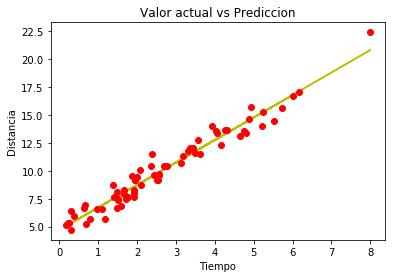

In [40]:
%matplotlib inline
plt.plot (df.tiempo, y_predicha, 'y')
plt.plot(df.tiempo, df.distancia_real,'ro ')
#plt.plot(df.tiempo, df.distancia_pred, 'g')
plt.title('Valor actual vs Prediccion')
plt.ylabel('Distancia')
plt.xlabel('Tiempo')

In [41]:
df['y_pred']= y_predicha

In [42]:
df.head()

,tiempo,distancia_pred,distancia_real,tiempo_media,distancia_media,sx,sy,sxx,syy,sxy,y_pred
0,1.170903,7.224715,5.711598,2.692089,10.148108,-1.521186,-4.436509,2.314006,19.682616,6.748755,7.054796
1,0.232948,5.442600,5.364020,2.692089,10.148108,-2.459141,-4.784088,6.047374,22.887494,11.764746,5.167909
3,3.142069,10.969932,10.671065,2.692089,10.148108,0.449981,0.522957,0.202483,0.273484,0.235321,11.020196
7,1.913064,8.634821,8.249350,2.692089,10.148108,-0.779025,-1.898758,0.606879,3.605282,1.479179,8.547803
9,0.632905,6.202519,6.690622,2.692089,10.148108,-2.059184,-3.457486,4.240239,11.954207,7.119599,5.972503


In [43]:
sy_pre = df.y_pred - np.mean(df.y_pred)

In [44]:
df['sy_pre'] =  sy_pre

In [45]:
df.head()

,tiempo,distancia_pred,distancia_real,tiempo_media,distancia_media,sx,sy,sxx,syy,sxy,y_pred,sy_pre
0,1.170903,7.224715,5.711598,2.692089,10.148108,-1.521186,-4.436509,2.314006,19.682616,6.748755,7.054796,-3.060173
1,0.232948,5.442600,5.364020,2.692089,10.148108,-2.459141,-4.784088,6.047374,22.887494,11.764746,5.167909,-4.947059
3,3.142069,10.969932,10.671065,2.692089,10.148108,0.449981,0.522957,0.202483,0.273484,0.235321,11.020196,0.905228
7,1.913064,8.634821,8.249350,2.692089,10.148108,-0.779025,-1.898758,0.606879,3.605282,1.479179,8.547803,-1.567166
9,0.632905,6.202519,6.690622,2.692089,10.148108,-2.059184,-3.457486,4.240239,11.954207,7.119599,5.972503,-4.142465


In [46]:
syy_pre = (sy_pre)**2

In [47]:
Sy_pre = np.sum(sy_pre)

In [48]:
Syy_pre = np.sum(syy_pre)

In [49]:
sy_ypre= sy*sy_pre

In [50]:
Sy_ypre = np.sum(sy_ypre)

In [51]:
R = Sy_ypre / np.sqrt(Syy*Syy_pre)

In [52]:
R

0.9776610453261808

Coeficiente de Determinacion R^2

In [53]:
R2 = R**2

In [54]:
R2 # mienstras mas cerca de 1 el modelo es mas preciso

0.9558211195482805

In [55]:
se = (df.distancia_real - df.y_pred)**2

In [56]:
se

0     1.804179
1     0.038460
3     0.121893
7     0.089074
9     0.515695
11    0.009850
12    0.173214
13    0.538575
14    0.012733
15    0.387090
16    1.140883
17    0.273239
18    0.811559
19    0.003063
21    1.180985
22    4.080301
23    0.041976
26    0.465223
27    0.000609
28    0.826143
29    0.354707
31    0.862712
32    0.087619
33    0.093381
34    1.015055
35    0.054674
36    0.061381
37    0.255813
39    1.424781
41    0.007148
        ...   
52    0.006853
55    2.002512
58    0.028339
61    2.549303
64    1.431656
65    0.014179
69    1.141582
70    0.056980
72    0.430255
73    0.163449
74    0.321186
75    0.208594
76    0.196922
77    0.004959
79    0.113536
82    0.389453
83    0.000044
84    0.017930
85    0.018216
86    1.028315
87    0.022409
88    0.254266
89    1.001317
91    0.731776
92    0.384158
93    1.572232
95    0.594372
96    0.465442
97    0.286679
99    0.401220
Length: 68, dtype: float64

In [57]:
Se= np.sum(se)

In [58]:
Se

37.169821256451684

R2 = (b * Sxy)/Syy = 1- Se/Syy  

In [59]:
b*Sxy/Syy

0.9558211195482808

In [60]:
1-Se/Syy

0.9557321789033512

# Otro Metodo para encontrar R2 con solo 3 parametros cuadrados

In [66]:
#SST= SSR+SSD
df['SST'] = (df['distancia_real'] - np.mean(df['distancia_real']))**2
df['SSD'] = (df['y_pred']-df['distancia_real'])**2
df['SSR'] = (df['y_pred']-np.mean(df['distancia_real']))**2

In [67]:
df[['SST','SSD','SSR']].head()

,SST,SSD,SSR
0,19.682616,1.804179,9.568580
1,22.887494,0.038460,24.802379
3,0.273484,0.121893,0.760538
7,3.605282,0.089074,2.560977
9,11.954207,0.515695,17.435672


In [68]:
#R2= SSR/SST
R2 = np.sum(df['SSR'])/np.sum(df['SST'])

In [69]:
R2

0.9559100601932105